# Final Q1

Stephanie Eordanidis

Final Exam Q3

College of Engineering & Computer Science, Syracuse University

CIS 700 Machine Learning and Security

Dr. Alsmadi Izzat

06/16/2021



## Purpose:
The purpose of this lab is to fullfil the requirements of the final exam's question 1

Using the eapoe.txt dataset from the course project, ensemble learning methods will be explored on this dataset. 

First method explored is Stacking, with various classifiers applied, measuring accuracy against each classifier prediciton, adn applying subsampling variants to the data to see the affects.

## (Hard/Soft)ware:
**Google Colaboratory**		https://colab.research.google.com/

**GPU**                     Python 3 Google Compute Engine backend

**Github**                  https://github.com/eordanis/CIS-700-final

## Resources:
**Original Source:**

* [Stacking Source 1](https://medium.com/@saugata.paul1010/ensemble-learning-bagging-boosting-stacking-and-cascading-classifiers-in-machine-learning-9c66cb271674)
* [Stacking Source 2](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/)

## Data:
The data for the selected project is setup as follows:
*   eapoe : 255 sentences
 *  eapoe : 25 sentences Compiled from various Edgar Allan Po Poems found on referenced poem sight  [1]. Converted to CSV and given sentiment labeling for use with classifiers
* iris: 150 entries
    * 150 row data set with 5 columns. Used to test functionallity

## Modifications:
 
 **Stacking**

 For stacking.py, code is based on both stacking sources indicated. Cleaned up file and added more classifiers to the py file run.



## Setup:
Project was run and tested on google colab environment.

“Stephanie_Eordanidis_CIS700_Final_Q1”. This workspace was run using the hosted runtime environment. This document is the current document being read.

In order to run against provided code base, it was necessary to sync the colab workspace the github repository files as follows

```
!git clone https://$GITHUB_AUTH@github.com/eordanis/CIS-700-final/
```

Running this command from the first cell in the workbook syncs the drive to the github repo location of project location, as well as change to the necessary directory


In [5]:
import shutil
# to prevent nesting problems, remove directory and its contents if exists
#if called to remove known existing, must restart runtime before cloning again
dir_path = '/content/CIS-700-final'
try:
    shutil.rmtree(dir_path)
except OSError as e:
    print("Error: %s : %s" % (dir_path, e.strerror))

In [ ]:
!git clone https://$GITHUB_AUTH@github.com/eordanis/CIS-700-final/
%cd CIS-700-final

## Stacking

The purpose of applying Stacking is in order to increase prediction model accuracy. Cross validation is used to determine and improve model accuracy.

In [79]:
!python3 -W ignore stacking.py -d 'data/eapoe.csv'


******************************************************************

	Stack Ensemble Classifier Example

******************************************************************

Beginning Classification Modeling...

Recording Time Elapse...

Accuracy	Variance (+/-)	Classifer

0.596		0.100		RandomForest  
0.665		0.115		KNeighbors  
0.642		0.106		LogisticRegression  
0.622		0.103		ExtraTrees  
0.579		0.097		DecisionTree  
0.536		0.103		AdaBoost  
0.678		0.089		Stacking  
<Figure size 640x480 with 1 Axes>

******** Completed Classification Modeling ********

Time Elapsed: 28secs



In [80]:
import visual as vis

vis.display_stacking_dataframe()

,Classifier,Accuracy,Variance
0,RandomForest,0.5960,0.1002
1,KNeighbors,0.6647,0.1149
2,LogisticRegression,0.6418,0.1062
3,ExtraTrees,0.6223,0.1031
4,DecisionTree,0.5788,0.0966
5,AdaBoost,0.5357,0.1033
6,Stacking,0.6785,0.0888


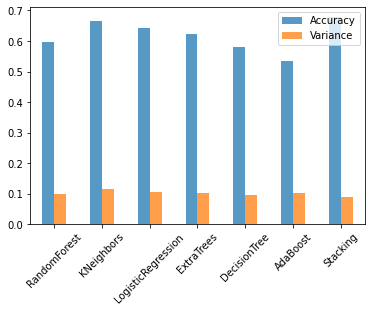

<Figure size 432x288 with 0 Axes>

In [81]:
vis.display_stacking_metrics()

### Results

As seen by above metric results, accuracies for the models are fairly consisten. However, ensemble stacking proves to be more accurate and less variant than some of the singular layered classifiers such as RandomForest and KNeighbors

https://www.kaggle.com/hdj0401/stacking-classifier-testing

In [ ]:
#PDF/HTML conversion of notebook
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
!jupyter nbconvert --output-dir='results/' --to PDF "Stephanie_Eordanidis_CIS700_Final_Q1.ipynb"
!jupyter nbconvert --output-dir='results/' --to HTML "Stephanie_Eordanidis_CIS700_Final_Q1.ipynb"